## Image Captioning - Multi-modal Models Application

### ViT- Vision Transformers+GPT2 Image Captioning

In [1]:
!pip install transformers datasets accelerate evaluate


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

2025-02-10 22:46:10.790248: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-10 22:46:11.109144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739216771.223632  158130 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739216771.253222  158130 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 22:46:11.518093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Load Model and Tokenization

In [5]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.48.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [6]:
model = model.to(device)

In [7]:
max_length = 24
num_beams = 4

In [ ]:
def get_caption(image_path):
    img = Image.open(image_path)
    if img.mode != "RGB":
        img = img.convert(mode="RGB")

    #extract features
    pixels = feature_extractor(images=[img], return_tensors="pt").pixel_values.to(device)
    #model inference generate the caption from the image using ViT model evaluation
    vocab_ids = model.generate(pixels,max_length=max_length,num_beams=num_beams)
    #decode ids into text
    output = tokenizer.batch_decode(vocab_ids, skip_special_tokens=True)
    result = [out.strip() for out in output]
    #display the input image and caption
    plt.imshow(img)
    plt.title(result)
    return result

## Make predictions

Now dowload and upload any image in colab notebook then get the caption

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a large brown dog laying in a pool of water']

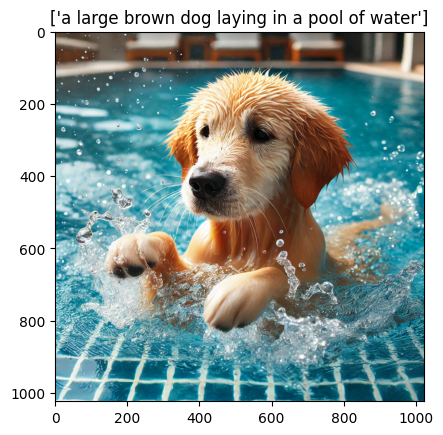

In [10]:
get_caption("../media/dog_swimming.png")

['a sunset view of the ocean with the sun setting']

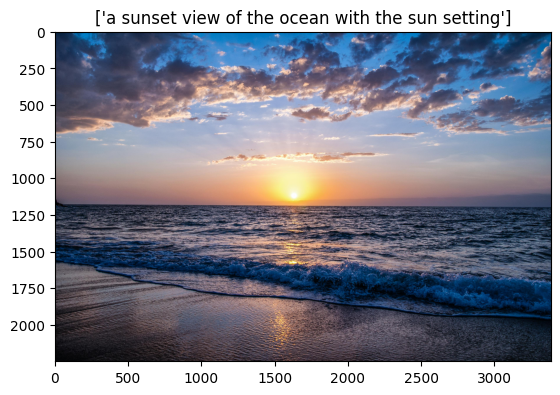

In [13]:
get_caption("../media/sunset.jpeg")

# OpenAI Clip

In [14]:
from transformers import CLIPProcessor, CLIPModel

## Load OpenAI Clip - VIT model

### [OpenAI Clip](https://openai.com/research/clip)

CLIP can be applied to any visual classification benchmark by simply providing the names of the visual categories to be recognized, similar to the “zero-shot” capabilities of GPT-2 and GPT-3.

CLIP is a multi-modal vision and language model. It can be used for image-text similarity and for zero-shot image classification. CLIP uses a ViT like transformer to get visual features and a causal language model to get the text features. Both the text and visual features are then projected to a latent space with identical dimension. The dot product between the projected image and text features is then used as a similar score.

In [15]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [16]:
clip_model = clip_model.to(device)

In [17]:
image = Image.open("../media/dog_swimming.png")

In [18]:
prob_captions = ["a cat swimming", "a dog swimming",'a dog and cat fighting']
inputs = processor(text=prob_captions, images=image, return_tensors="pt", padding=True)

In [19]:
inputs = inputs.to(device)

In [20]:
outputs = clip_model(**inputs)

In [21]:
# this is the image-text similarity score
similarity_ids = outputs.logits_per_image

In [22]:
probs_score = similarity_ids.softmax(dim=1)

In [23]:
probs_score

tensor([[1.5415e-02, 9.8458e-01, 6.3771e-06]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [24]:
caption = prob_captions[torch.argmax(probs_score)]

(-0.5, 1023.5, 1023.5, -0.5)

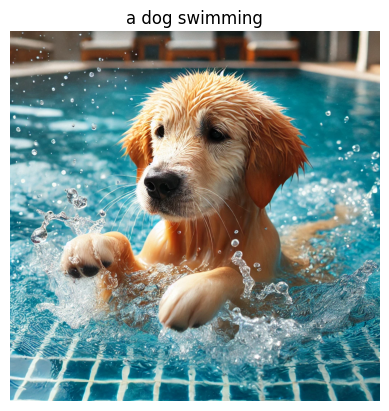

In [25]:
plt.imshow(image)
plt.title(caption)
plt.axis("off")

## Reference:

- [https://huggingface.co/nlpconnect/vit-gpt2-image-captioning](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)
- [https://huggingface.co/docs/transformers/model_doc/clip](https://huggingface.co/docs/transformers/model_doc/clip)